In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read data and convert categorical columns

In [35]:
df = pd.read_csv('/kaggle/input/body-levels-train-data/body_level_classification_train.csv')
df.head()

Gender        Age    Height     Weight H_Cal_Consump  Veg_Consump  \
0  Female  22.547298  1.722461  51.881263           yes     2.663421   
1    Male  19.799054  1.743702  54.927529           yes     2.000000   
2  Female  17.823438  1.708406  50.000000           yes     1.642241   
3  Female  19.007177  1.690727  49.895716           yes     1.212908   
4    Male  19.729250  1.793315  58.195150           yes     2.508835   

   Water_Consump Alcohol_Consump Smoking  Meal_Count Food_Between_Meals  \
0       1.041110              no      no    3.000000         Frequently   
1       2.847264       Sometimes      no    3.289260          Sometimes   
2       1.099231       Sometimes      no    3.452590          Sometimes   
3       1.029703       Sometimes      no    3.207071          Sometimes   
4       2.076933              no      no    3.435905          Sometimes   

  Fam_Hist H_Cal_Burn  Phys_Act  Time_E_Dev              Transport  \
0      yes         no  0.794402    1.391948  Public_Transportation   
1      yes         no  1.680844    2.000000  Public_Transportation   
2       no         no  0.418875    1.000000  Public_Transportation   
3       no         no  2.000000    1.000000  Public_Transportation   
4      yes         no  2.026668    1.443328             Automobile   

     Body_Level  
0  Body Level 1  
1  Body Level 1  
2  Body Level 1  
3  Body Level 1  
4  Body Level 1

In [36]:
df.describe()

Age       Height       Weight  Veg_Consump  Water_Consump  \
count  1477.000000  1477.000000  1477.000000  1477.000000    1477.000000   
mean     24.290420     1.701602    86.542290     2.421912       2.005120   
std       6.323081     0.094654    26.278277     0.540711       0.620307   
min      15.000000     1.456346    39.000000     1.000000       1.000000   
25%      19.895877     1.629194    65.000000     2.000000       1.549931   
50%      22.720449     1.701284    82.636162     2.416044       2.000000   
75%      26.000000     1.770278   106.690530     3.000000       2.482933   
max      55.246250     1.980000   173.000000     3.000000       3.000000   

        Meal_Count     Phys_Act   Time_E_Dev  
count  1477.000000  1477.000000  1477.000000  
mean      2.682104     1.023106     0.650672  
std       0.790751     0.844840     0.605199  
min       1.000000     0.000000     0.000000  
25%       2.644692     0.145687     0.000000  
50%       3.000000     1.000000     0.616045  
75%       3.000000     1.672639     1.000000  
max       4.000000     3.000000     2.000000

In [37]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [38]:
for col in ["Gender", "H_Cal_Consump", "Alcohol_Consump", "Smoking", "Food_Between_Meals", "Fam_Hist", "H_Cal_Burn", "Transport", "Body_Level"]:
    print(df[col].unique())

['Female' 'Male']
['yes' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['no' 'yes']
['Frequently' 'Sometimes' 'no' 'Always']
['yes' 'no']
['no' 'yes']
['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
['Body Level 1' 'Body Level 2' 'Body Level 3' 'Body Level 4']


In [39]:
for col in ["Gender", "H_Cal_Consump", "Alcohol_Consump", "Smoking", "Food_Between_Meals", "Fam_Hist", "H_Cal_Burn", "Transport", "Body_Level"]:
    df[col] = pd.Categorical(df[col], categories=df[col].unique()).codes

In [40]:
df.head()

Gender        Age    Height     Weight  H_Cal_Consump  Veg_Consump  \
0       0  22.547298  1.722461  51.881263              0     2.663421   
1       1  19.799054  1.743702  54.927529              0     2.000000   
2       0  17.823438  1.708406  50.000000              0     1.642241   
3       0  19.007177  1.690727  49.895716              0     1.212908   
4       1  19.729250  1.793315  58.195150              0     2.508835   

   Water_Consump  Alcohol_Consump  Smoking  Meal_Count  Food_Between_Meals  \
0       1.041110                0        0    3.000000                   0   
1       2.847264                1        0    3.289260                   1   
2       1.099231                1        0    3.452590                   1   
3       1.029703                1        0    3.207071                   1   
4       2.076933                0        0    3.435905                   1   

   Fam_Hist  H_Cal_Burn  Phys_Act  Time_E_Dev  Transport  Body_Level  
0         0           0  0.794402    1.391948          0           0  
1         0           0  1.680844    2.000000          0           0  
2         1           0  0.418875    1.000000          0           0  
3         1           0  2.000000    1.000000          0           0  
4         0           0  2.026668    1.443328          1           0

# Analysis the data

- ## statistical

Text(0.5, 1.0, 'Pearson Correlation')

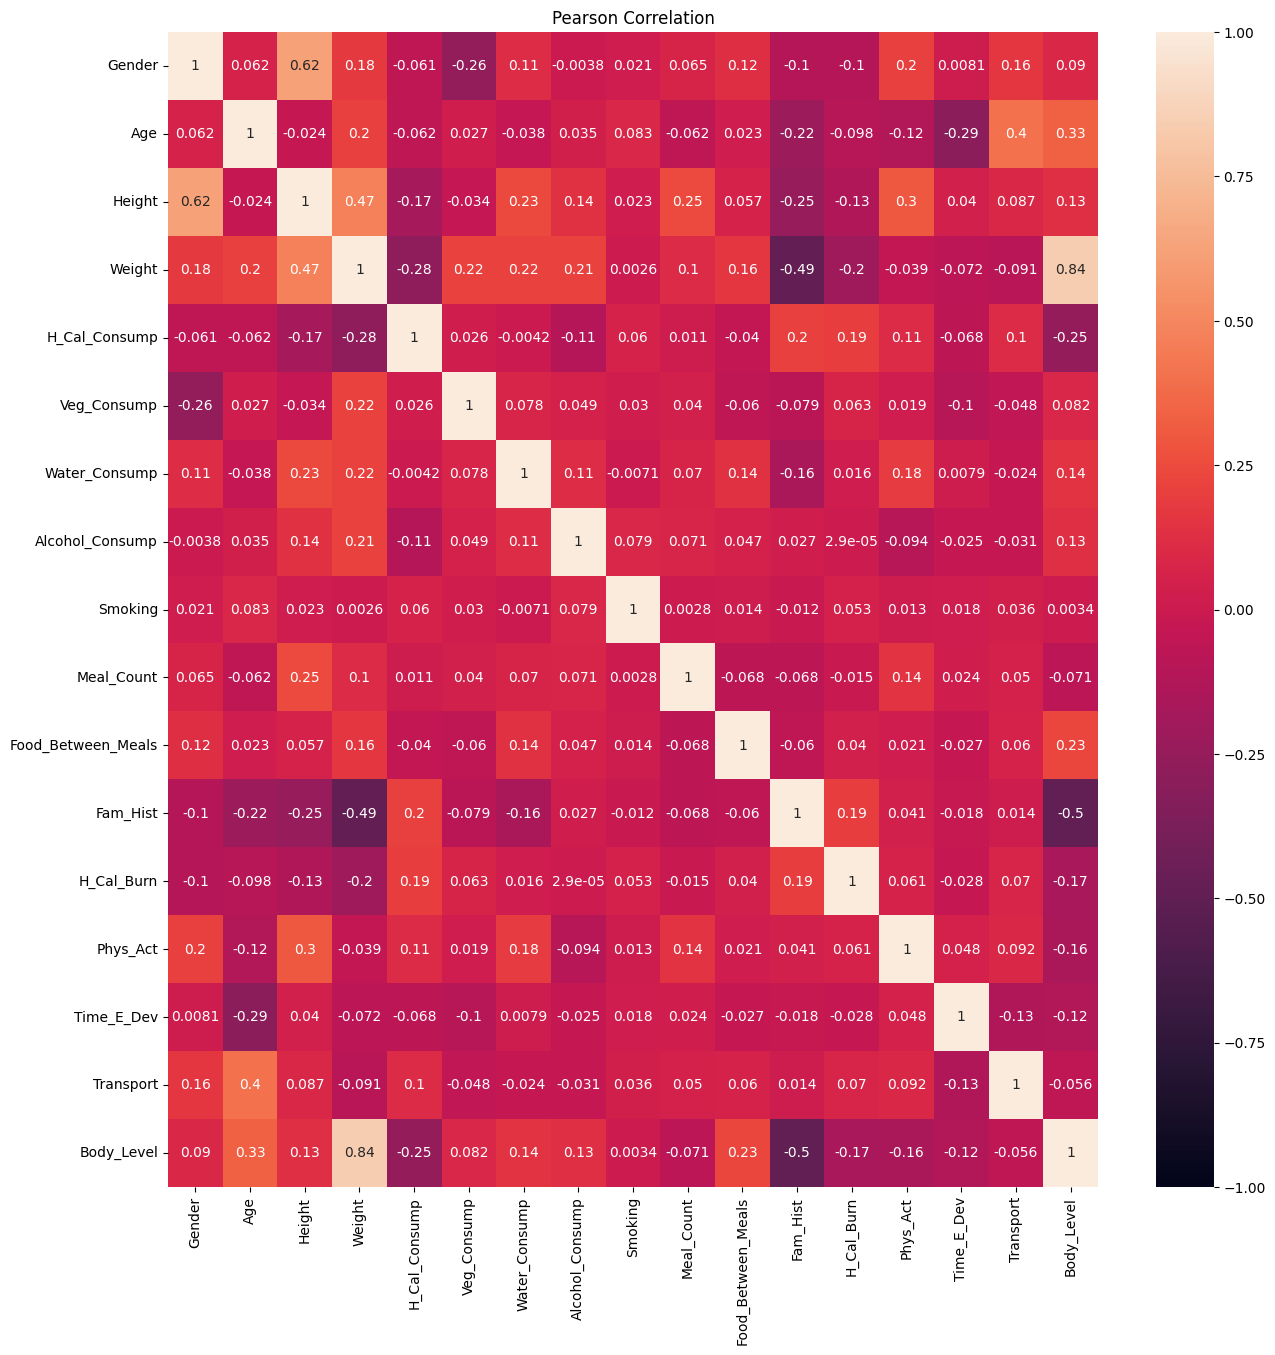

In [41]:
p = df.corr(method='pearson')
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(p, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

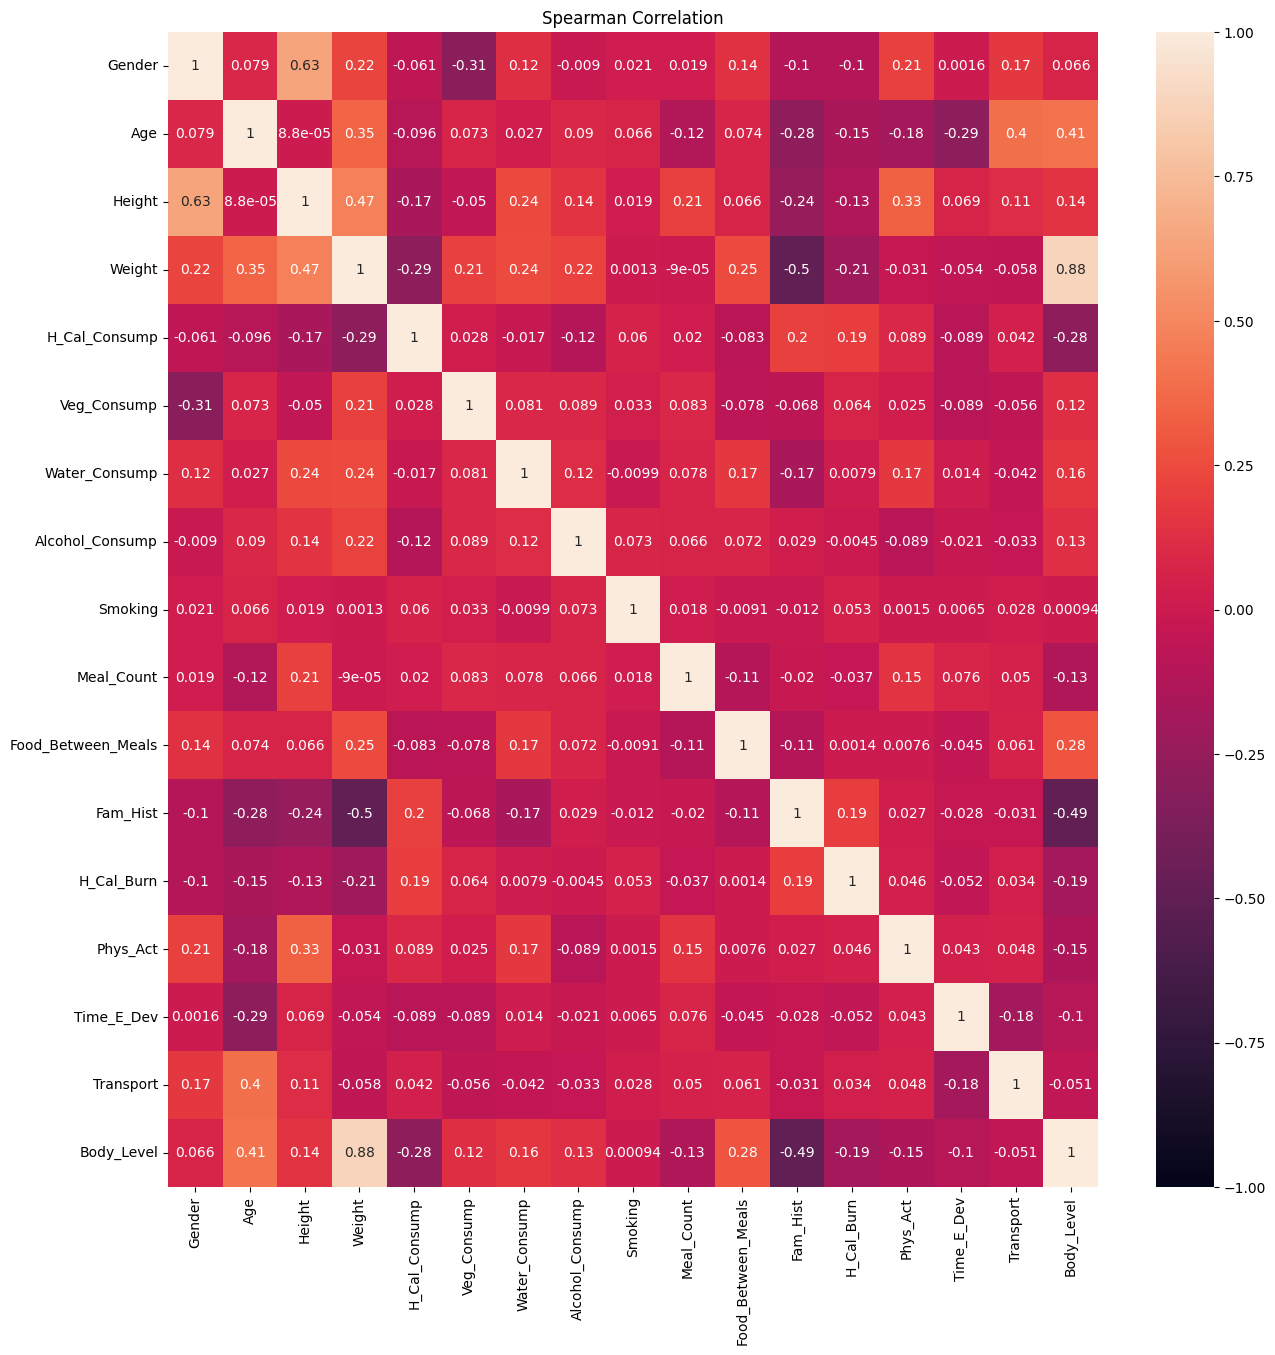

In [42]:
s = df.corr(method='spearman')
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(s, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Kendall Correlation')

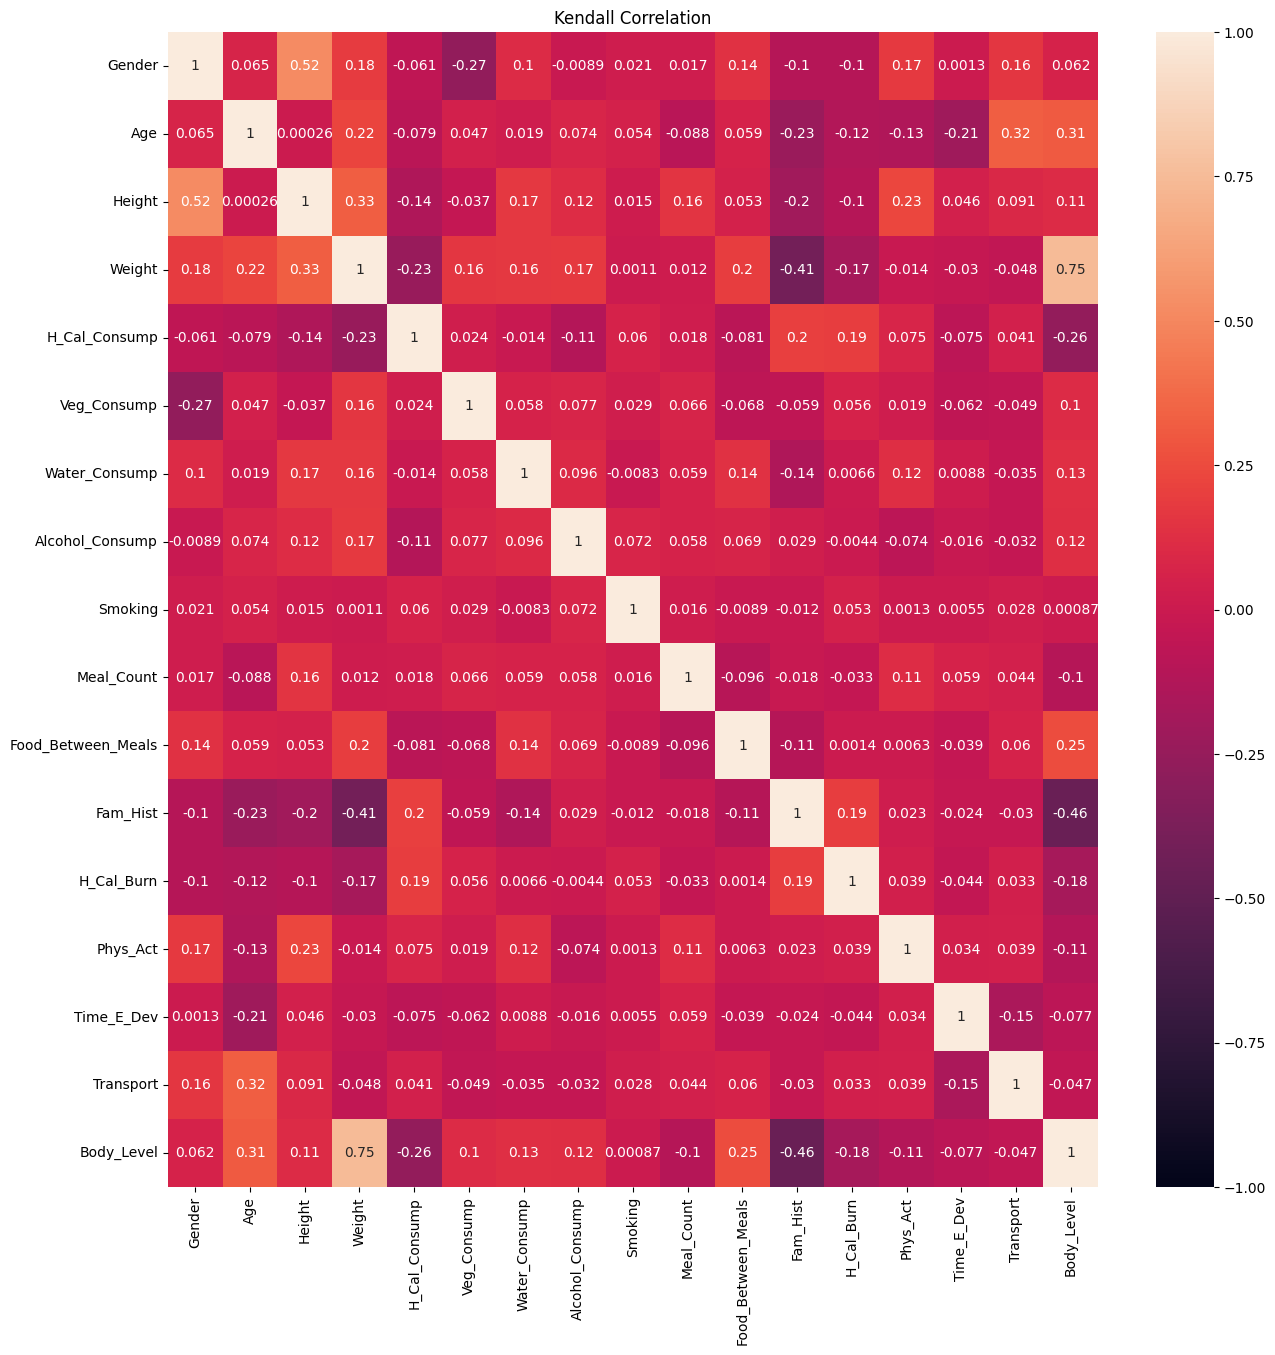

In [43]:
k = df.corr(method='kendall')
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(k, vmin=-1, 
                  vmax=1, annot=True)
plt.title("Kendall Correlation")

- ## visualization

<AxesSubplot: xlabel='Body_Level', ylabel='count'>

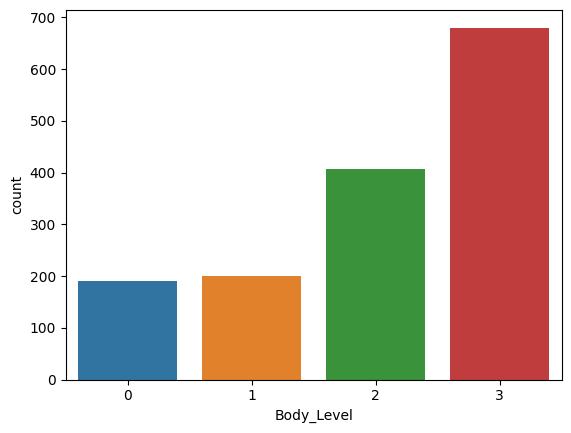

In [44]:
sns.countplot(x=df["Body_Level"])

# Random Forest model

In [45]:
from sklearn.model_selection import train_test_split
more_than_1_col = ["Age", "Height", "Weight", "H_Cal_Consump", "Veg_Consump", "Water_Consump", "Alcohol_Consump", "Meal_Count", "Food_Between_Meals", "Fam_Hist", "H_Cal_Burn", "Phys_Act"]
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]], test_size=0.25, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(1107, 16)
(370, 16)


In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=9, random_state=0, criterion="gini", class_weight="balanced")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.927027027027027


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, max_depth=9, random_state=0, criterion="gini", class_weight="balanced"))
#
# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(pipeline, X=df[df.columns[:-1]], y=df[df.columns[-1]], cv=5, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.94594595 0.91216216 0.93559322 0.9220339  0.89152542]
Cross Validation accuracy: 0.921 +/- 0.019


In [50]:
# Extract single tree
estimator = clf.estimators_[9]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns[:-1],
                class_names = df.columns[-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.259044 to fit
